# Experiments with regression trees

In [1]:
import numpy as np
import pylab as pl
import models

## Generate synthetic data 
Simulate data from crazy function and add Gaussian noise.
n is the number of examples to simulate.

In [2]:
def generate_synthetic_1d_data(n):
    X = np.random.uniform(-20, 20, size=n)
    X.sort()
    # Crazy function without noise
    y_noiseless = np.cos(X) * X
    # Add gaussian noise to each data point
    y = y_noiseless + np.random.normal(0, 1.5, size=n)
    X = X.reshape((n,1))
    return X, y, y_noiseless

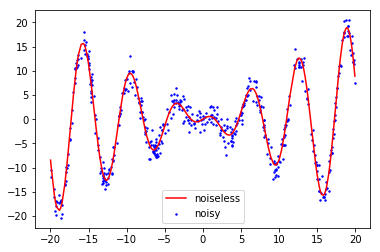

In [3]:
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

pl.scatter(X, y, c='b', s=2, label='noisy');
pl.plot(X, y_noiseless, c='r', label='noiseless')
pl.legend(loc='best');

## Regression trees
Visualize regression tree predictions on sythetic data as a function of the maximum depth (max_depth) of the tree.

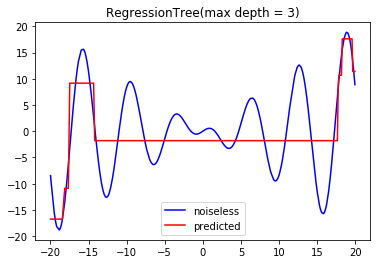

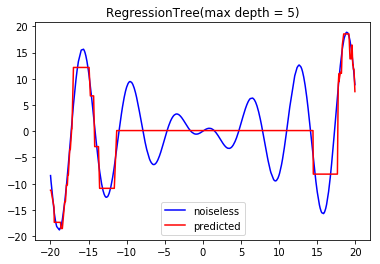

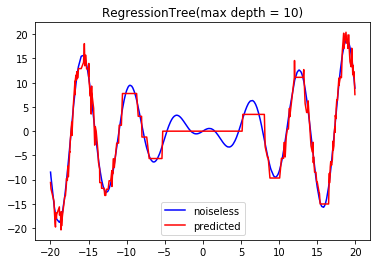

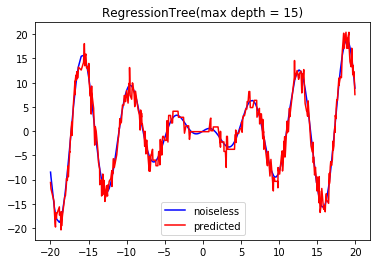

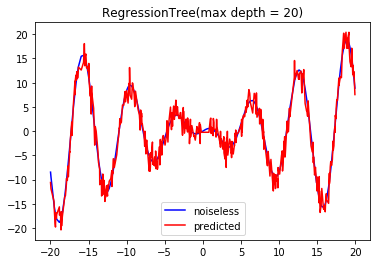

In [4]:
for max_depth in [3, 5, 10, 15, 20]:
    # Fit regression tree
    rt = models.RegressionTree(nfeatures = X.shape[1], max_depth = max_depth)
    rt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'RegressionTree(max depth = {max_depth})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, rt.predict(X), c='r', label='predicted')
    pl.legend(loc='best'); 

## Gradient-boosted regression tree (GBRT) boosting iteration number
Visualize GBRT predictions on sythetic data as a function of the number of number of boosting iterations (n_estimator) used to create the GBRT.

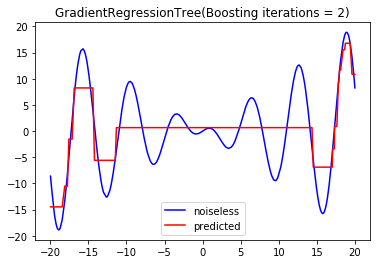

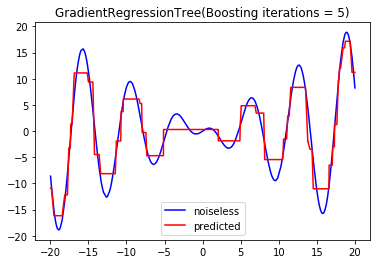

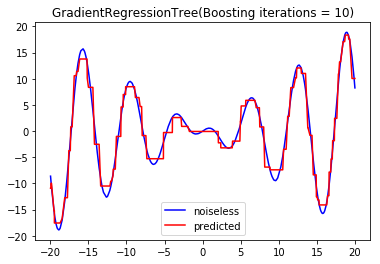

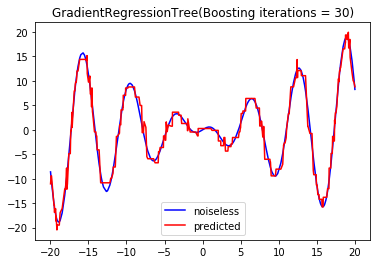

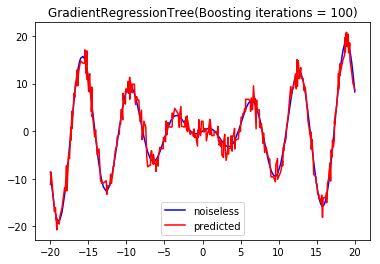

In [5]:
# GBRT hyper-parameters
max_depth=3
regularization_parameter=.75
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for n_estimator in [2, 5, 10, 30, 100]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimator, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Boosting iterations = {n_estimator})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');


## Gradient-boosted regression tree (GBRT) regularization parameter
Visualize GBRT predictions on sythetic data as a function of the regularization parameter

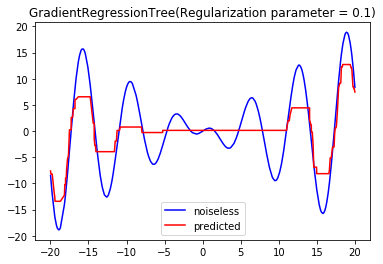

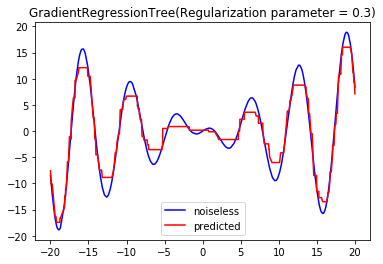

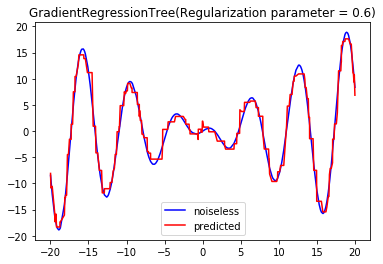

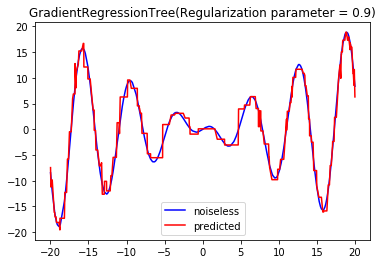

In [6]:
# GBRT hyper-parameters
max_depth=3
n_estimators=20
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for regularization_parameter in [.1, .3, .6, .9]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimators, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Regularization parameter = {regularization_parameter})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');

## Summary 
At this point, you have successfully run all three experiments in this notebook. Please summarize the emperical results. Try to consider:

1. Explain the qualitative differences in regression learned as a function of depth. Should we set the max depth very high or very low?

At low depths, the model gives poor predictions, particularly around the origin. This is because a lack of depth limits the number of branches, or possible predictions that the tree can make.

At high depths, overfitting is evident, especially at the origin, where small changes in the input cause large changes in the prediction, leading to larger errors.

Thus, the max depth should neither be very high nor very low, but rather something in between

2. Differences in how regression trees and GBRTs fit the data.

Regression trees directly fit the given (x, y) pairs and each trained tree aims to give the most accurate prediction of y given an example x. However, the first learner in the BGRT fits the actual data, and subsequent learners recursively fit the residual error. This means that the second learner fits the residual between the first learner and the ground truth from the training set, the third learner fits the residual between the predictions from the first two learners and the ground truth, and so on. Thus, in GBRT, only on e model attempts to fit the actual ground truth data, with all other learners fitting the residual. 

3. The trade-off between the regularization parameter and the number of boosting iterations in the GBRT.

The regularization parameter essentially serves as a term to decide how much of the residuals a subsequent learner in the GBRT should fit. Thus, increasing the regularization parameter will result in a better fit, since the learner is fitting the data closer to the actual residual, which enables the ensemble's prediction to be closer to the actual label.

The number of boosting iterations decides the number of weak learners that are used to fit the data. Obviously, having too few iterations results in vast inaccuracy since there is not enough granularity in the fitting to truly fit the data. However, having a large number of boosting iterations can easily lead to overfitting, since the weak learners are fitting extremely small changes in data, which is a primary characteristic of overfitting. Thus, boosting iterations will increase accuracy until the point of overfitting.

With both of these aspects in mind for each of the hyperparameters, if we increase one (for example, the regularization parameter), we should decrease the other (number of boosting iterations), as this will balance the overfitting increasing one parameter would result in. Increasing both at the same time would likely result in extreme overfitting.